In [96]:
import glob, os, cv2
import numpy as np

labels = ['cheo', 'diacau', 'muiten', 'sach', 'tamgiac', 'tinnhan', 'trong']

def load_data():
    paths = glob.glob("label/*/*.jpg")
    y = [os.path.split(os.path.dirname(p))[-1] for p in paths]
    y = [labels.index(i) for i in y]
    y = np.asarray(y)
    x = np.asarray([cv2.cvtColor(cv2.imread(p),cv2.COLOR_BGR2GRAY) for p in paths])
    return x, y
x, y = load_data()

In [97]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

muiten


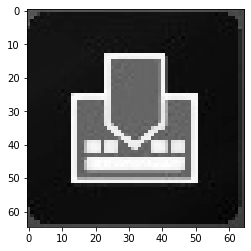

tamgiac


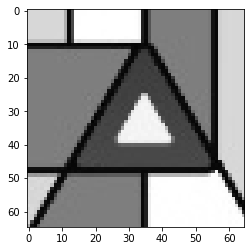

sach


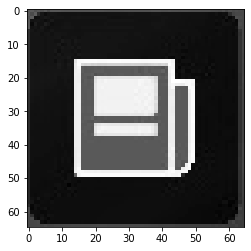

muiten


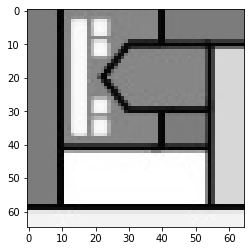

trong


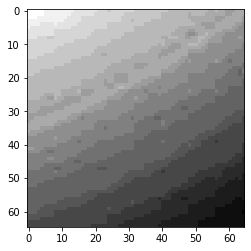

muiten


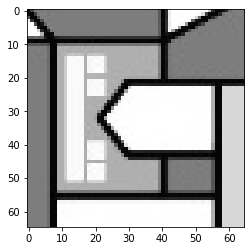

sach


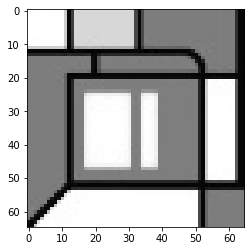

tamgiac


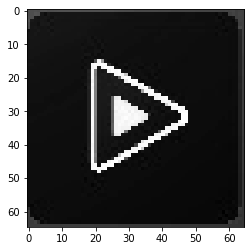

diacau


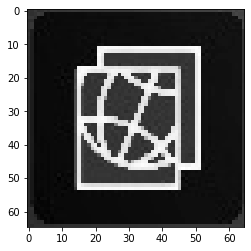

In [98]:
from matplotlib import pyplot as plt

for i in range(9):
    index = np.random.randint(len(x))
    print(labels[y[index]])
    plt.imshow(x[index], cmap=pyplot.get_cmap('gray'))
    plt.show()

In [94]:
from tensorflow import keras
from keras.layers import Input, Flatten, Dense
inputs = Input(shape=(65, 65, 1))
# model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(65, 65, 1)))
# model.add(keras.layers.MaxPooling2D((2, 2)))
x = Flatten()(inputs)
# model.add(keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
# # model.add(keras.layers.Dropout(0.5))
# outputs = Dense(7, activation='softmax')(x)
model = keras.models.Model(inputs, x)
# model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

AttributeError: 'tuple' object has no attribute 'layer'

In [95]:
x_train = x.reshape(-1, 65,65,1)/255.
print(x_train.shape)

AttributeError: 'Tensor' object has no attribute 'reshape'

In [75]:
x_train = x.reshape(-1, 65,65,1)/255.


history = model.fit(x_train, y, epochs=10, batch_size=x_train.shape[0], validation_split=0.2, verbose=1)

Train on 542 samples, validate on 136 samples
Epoch 1/10
542/542 [==============================] - 0s 31us/sample - loss: 0.0194 - acc: 0.9982 - val_loss: 7.7719 - val_acc: 0.2647
Epoch 2/10
542/542 [==============================] - 0s 37us/sample - loss: 0.0201 - acc: 0.9982 - val_loss: 7.7785 - val_acc: 0.2647
Epoch 3/10
542/542 [==============================] - 0s 33us/sample - loss: 0.0205 - acc: 0.9982 - val_loss: 7.7775 - val_acc: 0.2647
Epoch 4/10
542/542 [==============================] - 0s 30us/sample - loss: 0.0205 - acc: 0.9982 - val_loss: 7.7695 - val_acc: 0.2647
Epoch 5/10
542/542 [==============================] - 0s 32us/sample - loss: 0.0202 - acc: 0.9982 - val_loss: 7.7563 - val_acc: 0.2647
Epoch 6/10
542/542 [==============================] - 0s 30us/sample - loss: 0.0197 - acc: 0.9982 - val_loss: 7.7398 - val_acc: 0.2647
Epoch 7/10
542/542 [==============================] - 0s 26us/sample - loss: 0.0189 - acc: 0.9982 - val_loss: 7.7220 - val_acc: 0.2647
Epoch 8/1